Maximum autocorrelation no phase shift
259209440.23658487
Maximum  autocorrelation with phase shift
259209440.2364467
Scaling down no phase
Scale factor 0.999999999999467
Maximum autocorrelation no phase after scaling
259209440.23630854
Maximum correlation between phase and scaled no phase
225489517.51502323
Percentage out of total:
86.99124434258856 %


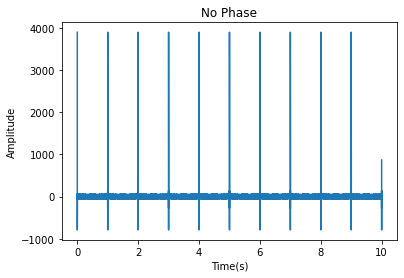

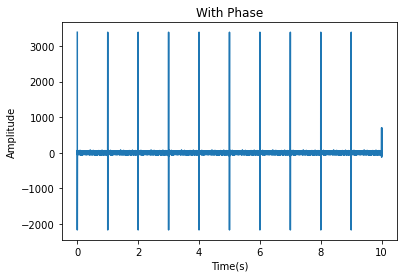

In [1]:
import numpy as np
import numpy as np
import math
from math import *
import matplotlib
import matplotlib.pyplot as plt
import random



def auto_correlation_range_of_freqs_random(low_freq, high_freq, slope_phases, left_phase, right_phase, length_seconds):


    #create a vector of phase values to mimic the phase from the Bode plot
    phases = np.arange(left_phase, right_phase+slope_phases, slope_phases)

    #sample at more than twice highest frequency
    fs = 2*high_freq+0.5*high_freq
    
    
    #create a time vector using the sampling rate
    #for this example 10 seconds is used
    t = np.arange(0, length_seconds, 1/fs)

    #create a vector of all frequencies that 
    #are in the possible input range from low to high (100Hz to 8kHz)
    frequencies = np.arange(low_freq, high_freq+1, 1)

    #empty vector to store sum of sinusoids without phase shift
    final_no_phase = np.zeros(len(t))
    
    #empty vector to store sum of sinusoids with phase shift
    final_w_phase = np.zeros(len(t))
    
    
    #variable to track the correct phase to add
    phase_index = 0

    #store the vectors in a list (only for comparative purposes later)
    final_vectors = [final_no_phase, final_w_phase]

    for freq in frequencies:
        #random scale factor since in reality the magnitudes will vary
        random_number = random.uniform(0, 1)
        
        #add the new frequency sinusoid to the appropriate vector
        final_vectors[0] = final_vectors[0] + random_number*np.cos(2*np.pi*freq*t)
        final_vectors[1] = final_vectors[1] + random_number*np.cos(2*np.pi*freq*t + (pi/180)*phases[phase_index])
        
        #move to next phase
        phase_index = phase_index + 1


    #calculate and report the peak auto correlations
    autocorrelation_max_no_phase = np.sum(final_vectors[0]*final_vectors[0])
    autocorrelation_max_w_phase = np.sum(final_vectors[1]*final_vectors[1])

    print("Maximum autocorrelation no phase shift")
    print(autocorrelation_max_no_phase)


    print("Maximum  autocorrelation with phase shift")
    print(autocorrelation_max_w_phase)


    #scale down the vector that had a larger autocorrelation 
    #so that both vectors are on the same scale
    if autocorrelation_max_no_phase > autocorrelation_max_w_phase:
        print("Scaling down no phase")

        scale_factor = autocorrelation_max_w_phase/autocorrelation_max_no_phase

        print("Scale factor", scale_factor)

        scaled_no_phase = final_vectors[0]*scale_factor

        print("Maximum autocorrelation no phase after scaling")
        correlation_after_scaled = np.sum(scaled_no_phase*scaled_no_phase)
        print(correlation_after_scaled)

        print("Maximum correlation between phase and scaled no phase")

        correlation_phase_no_phase = max(np.correlate(final_vectors[1], scaled_no_phase, mode = "full"))
        print(correlation_phase_no_phase)

        print("Percentage out of total:")

        print((correlation_phase_no_phase/correlation_after_scaled) * 100, "%")



    else:
        print("Scaling down with phase")

        scale_factor = autocorrelation_max_no_phase/autocorrelation_max_w_phase

        print("Scale factor", scale_factor)
        
        scaled_w_phase = final_vectors[1]*scale_factor

        print("Maximum autocorrelation correlation w phase after scaling")
        correlation_after_scaled = np.sum(scaled_w_phase*scaled_w_phase)
        print(correlation_after_scaled)

        print("Maximum correlation between no phase and scaled phase")

        correlation_phase_no_phase = max(np.correlate(final_vectors[0], scaled_w_phase, mode = "full"))
        print(correlation_phase_no_phase)

        print("Percentage out of total:")

        print((correlation_phase_no_phase/correlation_after_scaled) * 100, "%")


    fig1 = plt.figure(1)
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.title("No Phase")
    plt.plot(t, final_vectors[0])


    fig2 = plt.figure(2)
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.title("With Phase")
    plt.plot(t, final_vectors[1])
    
auto_correlation_range_of_freqs_random(100, 8000, -0.01257, 58.02, -60, 10)